In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv("victoria_electricity_demand.csv",usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],)

In [48]:
data=data.loc["2010":]

In [49]:
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


Weighted rolling features using pandas

In [50]:
df=data.copy()

In [51]:
#creating own  weight mean function
def weigh_mean(x,weights):
    return(weights*x).sum()/weights.sum()

In [52]:
#creating own weight standard deviation function
def weigh_std(x,weights):
    mean_w=weigh_mean(weights,x)
    var_w=(weights*(x-mean_w)**2).sum()/weights.sum()
    return np.sqrt(var_w)

In [53]:
weights=np.arange(1,24*7 + 1)

#computing weighted mean
roll=(
df["demand"].
    rolling(window=24*7).
    apply(weigh_mean,args=(weights,)).
    shift(freq="1H")
    .to_frame()
)
roll.columns=["Demand weighted_window_mean_168"]
roll

,Demand weighted_window_mean_168
date_time,
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
2010-01-01 05:00:00,NaN
...,...
2015-02-28 20:00:00,9466.041052
2015-02-28 21:00:00,9456.912218
2015-02-28 22:00:00,9441.317448


In [54]:
df = df.join(roll, how="left")
df

,demand,temperature,Demand weighted_window_mean_168
date_time,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN
...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081
2015-02-28 20:00:00,8883.230296,22.200,9466.041052
2015-02-28 21:00:00,8320.260550,18.900,9456.912218


In [55]:
weights=np.arange(1,24*7 + 1)

#computing weighted mean
roll=(
df["demand"].
    rolling(window=24*7).
    apply(weigh_std,args=(weights,)).
    shift(freq="1H")
    .to_frame()
)
roll.columns=["Demand weighted_window_std_168"]
roll

,Demand weighted_window_std_168
date_time,
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
2010-01-01 05:00:00,NaN
...,...
2015-02-28 20:00:00,9477.406248
2015-02-28 21:00:00,9467.043575
2015-02-28 22:00:00,9450.957000


In [56]:
df = df.join(roll, how="left")
df

,demand,temperature,Demand weighted_window_mean_168,Demand weighted_window_std_168
date_time,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN
...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081,9479.883451
2015-02-28 20:00:00,8883.230296,22.200,9466.041052,9477.406248
2015-02-28 21:00:00,8320.260550,18.900,9456.912218,9467.043575


In [57]:
result = (
    df["demand"]
    .rolling(window=24 * 7)  
    .agg(["mean"])  
    .shift(freq="1H")  
)  
result.columns = ["demand_window_168_mean"]
result

,demand_window_168_mean
date_time,
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
2010-01-01 05:00:00,NaN
...,...
2015-02-28 20:00:00,9654.616819
2015-02-28 21:00:00,9638.018555
2015-02-28 22:00:00,9624.108291


In [58]:
df = df.join(result, how="left")
df

,demand,temperature,Demand weighted_window_mean_168,Demand weighted_window_std_168,demand_window_168_mean
date_time,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN
...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081,9479.883451,9670.463454
2015-02-28 20:00:00,8883.230296,22.200,9466.041052,9477.406248,9654.616819
2015-02-28 21:00:00,8320.260550,18.900,9456.912218,9467.043575,9638.018555


## lets plot and see the difference between the rolling mean and rolling window mean

Text(0.5, 0, 'Time')

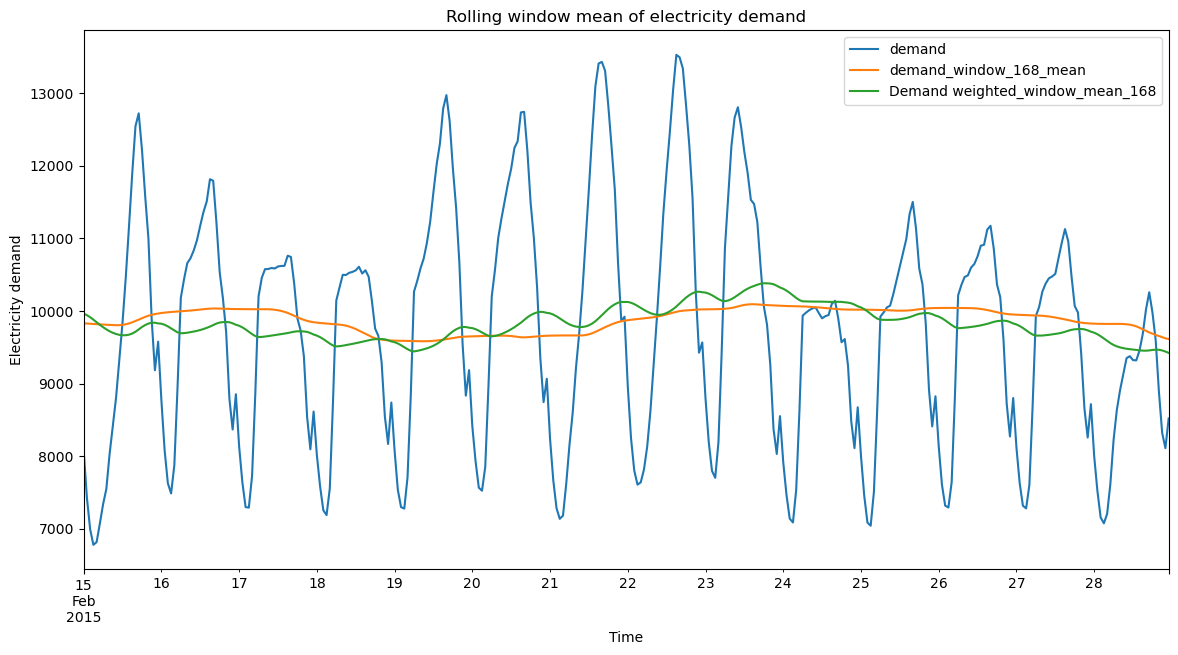

In [59]:
cols=["demand","demand_window_168_mean","Demand weighted_window_mean_168"]
ax=(df.iloc[-24 * 7 * 2 :]
   .loc[:,cols]. #filter columns
    plot(figsize=[14,7])
   ) #past three weeks
ax.set_title("Rolling window mean of electricity demand")
ax.set_ylabel("Electricity demand")
ax.set_xlabel("Time")

Here we can see that weighted mean is far more sensetative and capyures the trend more accuretly 

# weighted windows using sktime

In [60]:
from sktime.transformations.series.summarize import WindowSummarizer

In [61]:
df = data.copy()

In [62]:
def weighted_mean(x):
    weights = np.arange(1, 24*7 + 1) # [1, 2, ..., 168]
    return (weights * x).sum() / weights.sum()

In [63]:
transformer = WindowSummarizer(
    lag_feature={
        "lag": [1, 2, 3], # Lag features.
        "mean": [[1, 12], [1, 3]], # [[lag, window size]]
        "std": [[1, 12], [3, 12]],
        weighted_mean: [[1, 24 * 7]], # Can pass custom functions.
    },
    target_cols=["demand"],
)

result = transformer.fit_transform(df)
result

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_12,demand_mean_1_3,demand_std_1_12,demand_std_3_12,demand_weighted_mean_1_168,temperature
date_time,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.150
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,7992.054807,NaN,NaN,NaN,21.800
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,7537.921087,NaN,NaN,NaN,20.250
...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,9453.296237,10086.138955,468.988596,658.090105,9466.913081,28.350
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,9533.335885,9945.090785,392.623251,555.335360,9466.041052,22.200
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,9531.087995,9486.639086,396.572553,468.988596,9456.912218,18.900


In [64]:
df = result.join(df["demand"], how="left")
df

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_12,demand_mean_1_3,demand_std_1_12,demand_std_3_12,demand_weighted_mean_1_168,temperature,demand
date_time,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525,8314.448682
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400,8267.187296
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.150,7394.528444
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,7992.054807,NaN,NaN,NaN,21.800,6952.047520
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,7537.921087,NaN,NaN,NaN,20.250,6867.199634
...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,9453.296237,10086.138955,468.988596,658.090105,9466.913081,28.350,9596.777060
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,9533.335885,9945.090785,392.623251,555.335360,9466.041052,22.200,8883.230296
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,9531.087995,9486.639086,396.572553,468.988596,9456.912218,18.900,8320.260550


In [ ]:
S